In [1]:
# Import Libraries

from statsbombpy import sb

## Math Operations
import numpy as np
import math

## Data Preprocessing
import pandas as pd

## Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import to_rgba
from matplotlib import rcParams
import seaborn as sns
import networkx as nx
from PIL import Image
from highlight_text import ax_text, fig_text
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager, Sbopen
import mplsoccer
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

## Requests and downloads
import tqdm
import requests
from urllib.request import urlopen

## Filter warning
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load Statsbomb Competitions
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [3]:
# Load Statsbomb UEFA EURO 2020 matches
matches = sb.matches(competition_id=55, season_id=43)

In [4]:
matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3788753,2021-06-16,15:00:00.000,Europe - UEFA Euro,2020,Finland,Russia,0,1,available,...,2021-09-22T16:39:05.697512,2,Group Stage,Saint-Petersburg Stadium,Danny Desmond Makkelie,Markku Kanerva,Stanislav Cherchesov,1.1.0,2,2
1,3788765,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Turkey,3,1,available,...,2021-11-11T13:54:37.507376,3,Group Stage,Bakı Olimpiya Stadionu,Slavko Vinčić,Vladimir Petković,Şenol Güneş,1.1.0,2,2
2,3795107,2021-07-02,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Italy,1,2,available,...,2021-09-23T00:02:51.495862,5,Quarter-finals,Allianz Arena,Slavko Vinčić,Roberto Martínez Montoliú,Roberto Mancini,1.1.0,2,2
3,3795221,2021-07-07,21:00:00.000,Europe - UEFA Euro,2020,England,Denmark,2,1,available,...,2021-09-22T22:33:37.494366,6,Semi-finals,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Kasper Hjulmand,1.1.0,2,2
4,3795506,2021-07-11,21:00:00.000,Europe - UEFA Euro,2020,Italy,England,1,1,available,...,2021-09-22T22:40:31.690550,7,Final,Wembley Stadium,Björn Kuipers,Roberto Mancini,Gareth Southgate,1.1.0,2,2
5,3794688,2021-06-29,18:00:00.000,Europe - UEFA Euro,2020,England,Germany,2,0,available,...,2021-09-22T23:46:25.457149,4,Round of 16,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Joachim Löw,1.1.0,2,2
6,3794692,2021-06-29,21:00:00.000,Europe - UEFA Euro,2020,Sweden,Ukraine,1,2,available,...,2021-09-22T23:38:19.483199,4,Round of 16,Hampden Park,Daniele Orsato,Jan Olof Andersson,Andrii Shevchenko,1.1.0,2,2
7,3794686,2021-06-28,18:00:00.000,Europe - UEFA Euro,2020,Croatia,Spain,3,5,available,...,2021-09-22T23:30:10.428563,4,Round of 16,Parken,Cüneyt Çakιr,Zlatko Dalić,Luis Enrique Martínez García,1.1.0,2,2
8,3794687,2021-06-27,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Portugal,1,0,available,...,2021-09-22T16:40:48.020474,4,Round of 16,Estadio de La Cartuja,Felix Brych,Roberto Martínez Montoliú,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3794685,2021-06-26,21:00:00.000,Europe - UEFA Euro,2020,Italy,Austria,2,1,available,...,2021-09-22T16:40:41.310001,4,Round of 16,Wembley Stadium,Anthony Taylor,Roberto Mancini,Franco Foda,1.1.0,2,2


In [5]:
# Load Statsbomb UEFA EURO 2020 Final Match
events = sb.events(match_id = 3795506)
events.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_penalty_saved_to_post', 'goalkeeper_position',
       'goalkeeper_shot_saved_off_target', 'goalkeeper_shot_saved_to_post',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
  

In [6]:
# Filtering only the columns I need
events_filt = events[['location', 'minute', 'player', 'team', 'shot_outcome', 'shot_statsbomb_xg', 
                      'shot_technique', 'shot_type']]
events_filt

,location,minute,player,team,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
0,NaN,0,NaN,Italy,NaN,NaN,NaN,NaN
1,NaN,0,NaN,England,NaN,NaN,NaN,NaN
2,NaN,0,NaN,England,NaN,NaN,NaN,NaN
3,NaN,0,NaN,Italy,NaN,NaN,NaN,NaN
4,NaN,45,NaN,England,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4791,NaN,92,NaN,Italy,NaN,NaN,NaN,NaN
4792,NaN,100,NaN,England,NaN,NaN,NaN,NaN
4793,NaN,121,NaN,England,NaN,NaN,NaN,NaN
4794,"[90.3, 28.3]",87,NaN,Italy,NaN,NaN,NaN,NaN


In [7]:
# Shot_outcome withou missing value
events_filt = events_filt[events_filt['shot_outcome'].isnull()==False].reset_index()
events_filt

,index,location,minute,player,team,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
0,4356,"[113.1, 30.8]",1,Luke Shaw,England,Goal,0.182316,Half Volley,Open Play
1,4357,"[95.0, 54.7]",7,Lorenzo Insigne,Italy,Off T,0.037582,Normal,Free Kick
2,4358,"[88.1, 39.5]",27,Lorenzo Insigne,Italy,Off T,0.014960,Normal,Open Play
3,4359,"[95.9, 46.8]",34,Federico Chiesa,Italy,Off T,0.040907,Normal,Open Play
4,4360,"[106.4, 41.6]",45,Ciro Immobile,Italy,Blocked,0.165479,Half Volley,Open Play
5,4361,"[100.7, 39.4]",45,Marco Verratti,Italy,Saved,0.082292,Normal,Open Play
6,4362,"[87.8, 51.1]",48,Leonardo Bonucci,Italy,Off T,0.012156,Normal,Open Play
7,4363,"[97.8, 36.8]",50,Lorenzo Insigne,Italy,Off T,0.102544,Normal,Free Kick
8,4364,"[105.8, 23.8]",52,Lorenzo Insigne,Italy,Off T,0.024812,Normal,Open Play
9,4365,"[110.7, 41.0]",55,Harry Maguire,England,Off T,0.036051,Normal,Open Play


In [8]:
# Divide the "location" column into two separate columns, one for the x value and one for the y value
shots_Loc = events_filt['location']
shots_Loc = pd.DataFrame(shots_Loc.to_list(), columns=['x', 'y'])
shots_Loc

,x,y
0,113.1,30.8
1,95.0,54.7
2,88.1,39.5
3,95.9,46.8
4,106.4,41.6
5,100.7,39.4
6,87.8,51.1
7,97.8,36.8
8,105.8,23.8
9,110.7,41.0


In [9]:
# Add x and y column to events_filt df
events_filt['x'] = shots_Loc['x']
events_filt['y'] = shots_Loc['y']

# Delete not useful columns
events_filt = events_filt[['minute', 'player', 'team', 'shot_outcome', 'shot_statsbomb_xg', 
                           'shot_technique', 'shot_type', 'x', 'y']]
events_filt

,minute,player,team,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,x,y
0,1,Luke Shaw,England,Goal,0.182316,Half Volley,Open Play,113.1,30.8
1,7,Lorenzo Insigne,Italy,Off T,0.037582,Normal,Free Kick,95.0,54.7
2,27,Lorenzo Insigne,Italy,Off T,0.014960,Normal,Open Play,88.1,39.5
3,34,Federico Chiesa,Italy,Off T,0.040907,Normal,Open Play,95.9,46.8
4,45,Ciro Immobile,Italy,Blocked,0.165479,Half Volley,Open Play,106.4,41.6
5,45,Marco Verratti,Italy,Saved,0.082292,Normal,Open Play,100.7,39.4
6,48,Leonardo Bonucci,Italy,Off T,0.012156,Normal,Open Play,87.8,51.1
7,50,Lorenzo Insigne,Italy,Off T,0.102544,Normal,Free Kick,97.8,36.8
8,52,Lorenzo Insigne,Italy,Off T,0.024812,Normal,Open Play,105.8,23.8
9,55,Harry Maguire,England,Off T,0.036051,Normal,Open Play,110.7,41.0


In [10]:
# Create two df: one for the Italy team and one for the England team
events_filt_Italy = events_filt[events_filt['team'] == 'Italy'].reset_index()
events_filt_England = events_filt[events_filt['team'] == 'England'].reset_index()
events_filt_Italy

,index,minute,player,team,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,x,y
0,1,7,Lorenzo Insigne,Italy,Off T,0.037582,Normal,Free Kick,95.0,54.7
1,2,27,Lorenzo Insigne,Italy,Off T,0.014960,Normal,Open Play,88.1,39.5
2,3,34,Federico Chiesa,Italy,Off T,0.040907,Normal,Open Play,95.9,46.8
3,4,45,Ciro Immobile,Italy,Blocked,0.165479,Half Volley,Open Play,106.4,41.6
4,5,45,Marco Verratti,Italy,Saved,0.082292,Normal,Open Play,100.7,39.4
5,6,48,Leonardo Bonucci,Italy,Off T,0.012156,Normal,Open Play,87.8,51.1
6,7,50,Lorenzo Insigne,Italy,Off T,0.102544,Normal,Free Kick,97.8,36.8
7,8,52,Lorenzo Insigne,Italy,Off T,0.024812,Normal,Open Play,105.8,23.8
8,10,56,Federico Chiesa,Italy,Blocked,0.021806,Normal,Open Play,107.3,21.2
9,11,56,Lorenzo Insigne,Italy,Saved,0.079823,Normal,Open Play,117.9,29.8


In [11]:
events_filt_England

,index,minute,player,team,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,x,y
0,0,1,Luke Shaw,England,Goal,0.182316,Half Volley,Open Play,113.1,30.8
1,9,55,Harry Maguire,England,Off T,0.036051,Normal,Open Play,110.7,41.0
2,13,63,John Stones,England,Saved Off Target,0.071100,Normal,Open Play,112.8,39.1
3,17,84,Luke Shaw,England,Off T,0.007042,Half Volley,Open Play,97.1,25.1
4,18,96,Kalvin Phillips,England,Off T,0.016539,Half Volley,Open Play,95.6,51.2
5,23,107,Jack Grealish,England,Blocked,0.105794,Half Volley,Open Play,107.6,37.4
6,26,120,Harry Kane,England,Goal,0.760000,Normal,Penalty,108.0,40.0
7,28,122,Harry Maguire,England,Goal,0.760000,Normal,Penalty,108.1,40.0
8,30,124,Marcus Rashford,England,Post,0.760000,Normal,Penalty,108.0,39.9
9,32,125,Jadon Sancho,England,Saved,0.760000,Normal,Penalty,107.8,40.0


In [12]:
# Extract the expected goals, outcome and the time data for both the teams
Italy_xg = events_filt_Italy['shot_statsbomb_xg'].tolist()
Italy_minute = events_filt_Italy['minute'].tolist()
Italy_outcome = events_filt_Italy['shot_outcome'].tolist()

England_xg = events_filt_England['shot_statsbomb_xg'].tolist()
England_minute = events_filt_England['minute'].tolist()
England_outcome = events_filt_England['shot_outcome'].tolist()

In [13]:
# Generate the cumulative expected goals values for both the teams
Italy_xg_cumu = np.cumsum(Italy_xg)
England_xg_cumu = np.cumsum(England_xg)

In [14]:
Italy_minute = [0] + Italy_minute
England_minute = [0] + England_minute
Italy_xg_cumu = [0] + Italy_xg_cumu.tolist()
England_xg_cumu = [0] + England_xg_cumu.tolist()

In [15]:
Italy_minute , Italy_xg_cumu, England_minute, England_xg_cumu

([0,
  7,
  27,
  34,
  45,
  45,
  48,
  50,
  52,
  56,
  56,
  61,
  66,
  66,
  72,
  98,
  102,
  104,
  106,
  120,
  120,
  121,
  123,
  125,
  126],
 [0,
  0.037581686,
  0.0525419275,
  0.0934490015,
  0.2589275115,
  0.3412198315,
  0.3533762285,
  0.4559205735,
  0.4807327375,
  0.5025385605,
  0.5823619405,
  0.6369528255,
  0.6941112254999999,
  1.5934305754999998,
  1.8098865854999997,
  1.8378848764999998,
  1.9974526764999998,
  2.0359771815,
  2.0675195385,
  2.1584076185,
  2.9184076185,
  3.6784076184999996,
  4.438407618499999,
  5.198407618499999,
  5.958407618499999],
 [0, 1, 55, 63, 84, 96, 107, 120, 122, 124, 125, 127],
 [0,
  0.18231645,
  0.218367768,
  0.289468204,
  0.296509763,
  0.313048593,
  0.41884253299999996,
  1.178842533,
  1.938842533,
  2.698842533,
  3.4588425330000003,
  4.218842533])

In [16]:
# Eliminate the penalties for both the teams
Italy_minute_updated = [value for value in Italy_minute if value < 120]
Italy_xg_cumu_updated = [value for value in Italy_xg_cumu if value < 2.1]
Italy_outcome_updated = Italy_outcome[:len(Italy_outcome)-5]

England_minute_updated = [value for value in England_minute if value < 120]
England_xg_cumu_updated = [value for value in England_xg_cumu if value < 1]
England_outcome_updated = England_outcome[:len(England_outcome)-5]

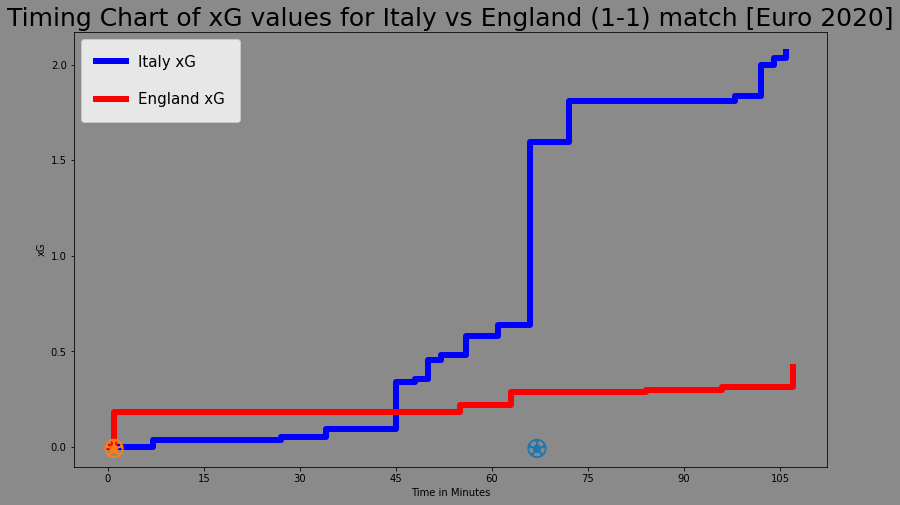

In [17]:
# Plot the time chart for the cumulative expected goals

football_path, attributes = svg2paths('football.svg')
football_marker = parse_path(attributes[0]['d'])
football_marker.vertices -= football_marker.vertices.mean(axis=0)
football_marker = football_marker.transformed(mpl.transforms.Affine2D().rotate_deg(180))
football_marker = football_marker.transformed(mpl.transforms.Affine2D().scale(-1,1))

fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor(('#8A8A8A'))
ax.patch.set_facecolor(('#8A8A8A'))

plt.xticks(range(0, 130, 15))
plt.xlabel('Time in Minutes')
plt.ylabel('xG')

ax.step(Italy_minute_updated, Italy_xg_cumu_updated, where='post', color='blue', label='Italy xG', linewidth=6)
ax.step(England_minute_updated, England_xg_cumu_updated, where='post', color='red', label='England xG', linewidth=6)

plt.plot(67, Italy_outcome_updated =='Goal', marker = football_marker, markersize=20)
plt.plot(1, England_outcome_updated =='Goal', marker = football_marker, markersize=20)

ax.legend(borderpad=1, markerscale=0.5, labelspacing=1.5, loc='upper left', fontsize=15)

ax.set_title("Timing Chart of xG values for Italy vs England (1-1) match [Euro 2020]", size=25)

plt.savefig("xg.jpg", bbox_inches = 'tight')

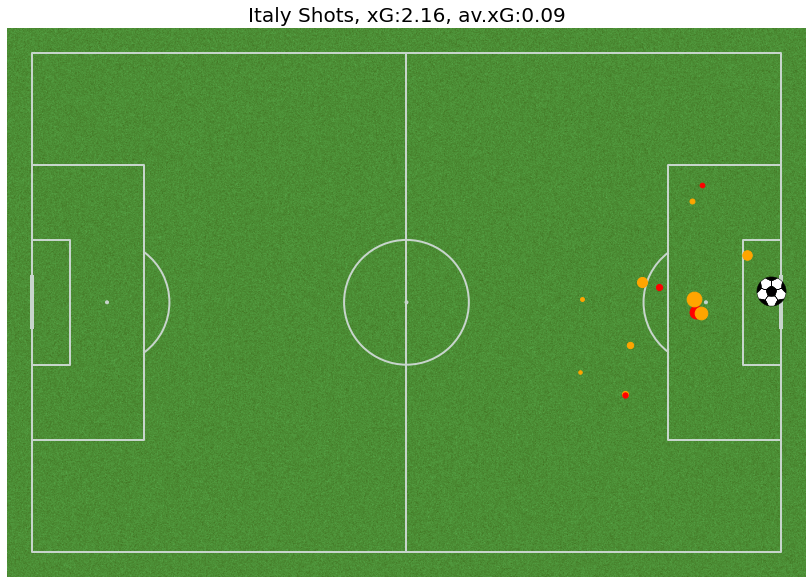

In [18]:
# Plot the shots for Italy team

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='grass',
              line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5, 8), constrained_layout=True, tight_layout=False)


for i in range(len(Italy_minute_updated)):
    if Italy_outcome_updated [i]=='Goal':
        pitch.scatter(events_filt_Italy.x[i], events_filt_Italy.y[i], marker='football', s=1000*events_filt_Italy.shot_statsbomb_xg[i], ax=ax)
    elif Italy_outcome_updated [i] =='Blocked':
        pitch.scatter(events_filt_Italy.x[i], events_filt_Italy.y[i], color='red', s=1000*events_filt_Italy.shot_statsbomb_xg[i], ax=ax)
    elif Italy_outcome_updated [i] in ['Wayward', 'Off T']:
        pitch.scatter(events_filt_Italy.x[i], events_filt_Italy.y[i], color='orange', s=1000*events_filt_Italy.shot_statsbomb_xg[i], ax=ax)

ax.set_title("Italy Shots, xG:"+str(round(Italy_xg_cumu[-6],2))+", av.xG:"+str(round(Italy_xg_cumu[-6]/len(events_filt_Italy),2)), size=20)
             
plt.savefig("ITA-Shots.jpg", bbox_inches = 'tight')

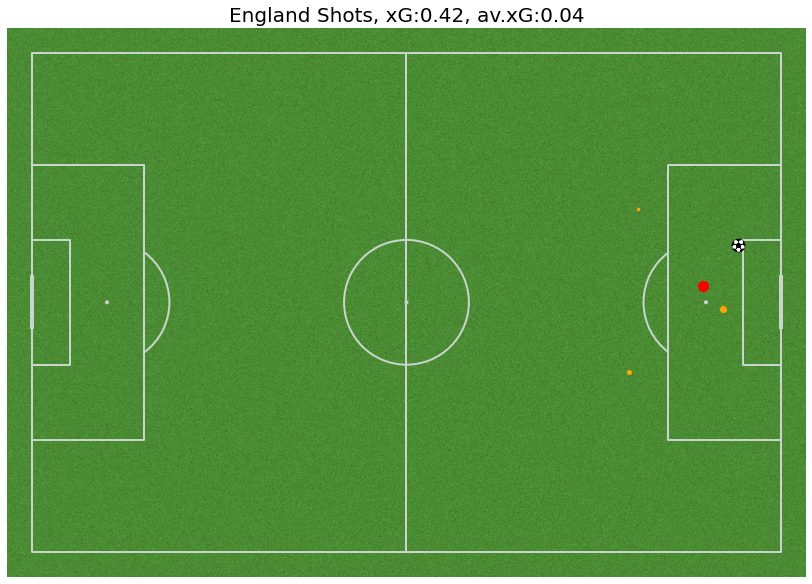

In [19]:
# Plot the shots for Italy team

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='grass', 
              line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5, 8),
              constrained_layout=True, tight_layout=False)


for i in range(len(England_minute_updated)-1):
    if England_outcome_updated[i]=='Goal':
        pitch.scatter(events_filt_England.x[i], events_filt_England.y[i], marker='football', s=1000*events_filt_England.shot_statsbomb_xg[i], ax=ax)
    elif England_outcome_updated[i]=='Blocked':
        pitch.scatter(events_filt_England.x[i], events_filt_England.y[i], color='red', s=1000*events_filt_England.shot_statsbomb_xg[i], ax=ax)
    elif England_outcome_updated[i] in ['Wayward', 'Off T']:
        pitch.scatter(events_filt_England.x[i], events_filt_England.y[i], color='orange', s=1000*events_filt_England.shot_statsbomb_xg[i], ax=ax)

ax.set_title("England Shots, xG:"+str(round(England_xg_cumu[-6],2))+", av.xG:"+str(round(England_xg_cumu[-6]/len(events_filt_England),2)), size=20)

plt.savefig("ENG-Shots.jpg", bbox_inches = 'tight')